<a href="https://colab.research.google.com/github/yasinsoylu1997/TEZZ2/blob/main/hybr%C4%B1t_my_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
import keras
import keras.utils
from keras import utils as np_utils
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
#!pip install visualkeras
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
!pip install visualkeras


In [24]:
labels = ['Lung_Opacity','COVID','Normal','Viral Pneumonia']

In [25]:
X = []
y = []
image_size = 32
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/tezz3/COVID-19_Radiography_Dataset_masked',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)

        
X = np.array(X)
y = np.array(y)

100%|██████████| 1345/1345 [00:06<00:00, 193.69it/s]


In [26]:
from imblearn.over_sampling import RandomOverSampler
reshaped_X = X.reshape(X.shape[0],-1)

#oversampling
oversample = RandomOverSampler()
oversampled_X, oversampled_y  = oversample.fit_resample(reshaped_X , y)

# reshaping X back to the first dims
new_X = oversampled_X.reshape(-1,32,32,3)
oversampled_y


array(['Lung_Opacity', 'Lung_Opacity', 'Lung_Opacity', ...,
       'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia'],
      dtype='<U15')

In [27]:
train_images, test_images,train_labels, test_labels = train_test_split(new_X , oversampled_y , test_size=0.25, random_state=42,shuffle=True)

In [28]:
train_images=train_images[:1500]
test_images=test_images[:1500]
train_labels=train_labels[:1500]
test_labels=test_labels[:1500]


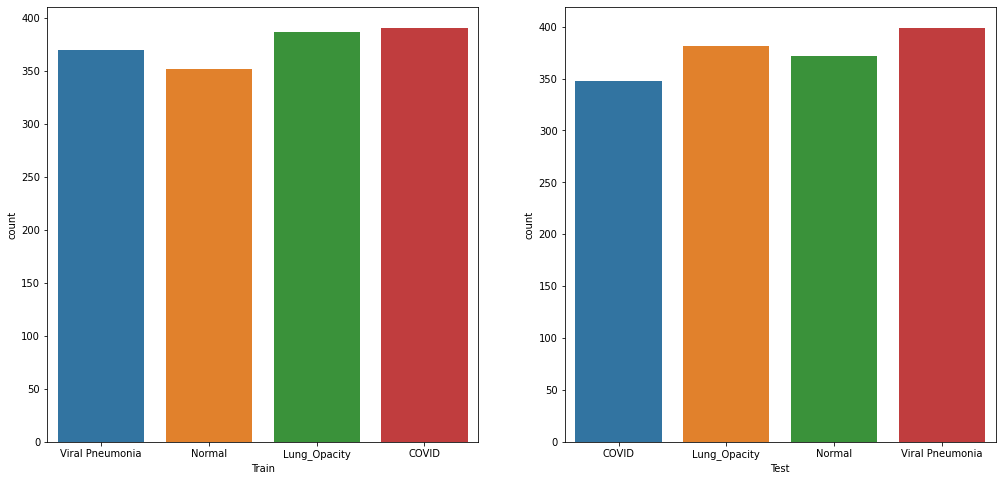

In [29]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [30]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [32]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [33]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [34]:
y_test_one_hot

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [35]:
activation = 'relu'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (32, 32, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

In [36]:
#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)

In [37]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0   

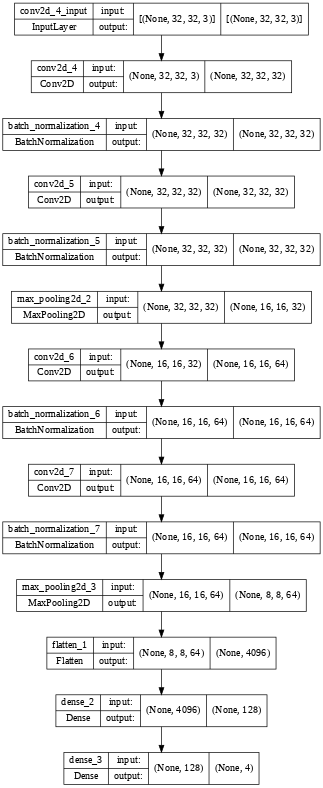

In [38]:
from keras.utils.vis_utils import plot_model

plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=50)

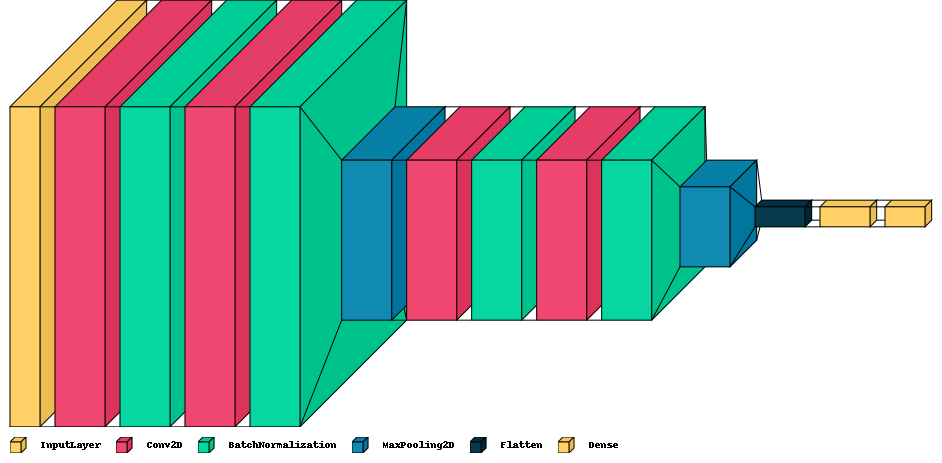

<Figure size 144x144 with 0 Axes>

In [39]:
import visualkeras
from PIL import ImageFont
plt.figure(figsize=(2, 2))
visualkeras.layered_view(cnn_model, legend=True,spacing=15,scale_xy = 10 , scale_z = 10, max_z = 50) 

In [40]:
checkpoint = ModelCheckpoint("cnn.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 4, min_delta = 0.001,mode='auto',verbose=1)
early_stop=tf.keras.callbacks.EarlyStopping( monitor="val_accuracy",patience=4,verbose=1,mode="auto",)

In [41]:
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=100, validation_data = (x_test, y_test_one_hot),batch_size=8,callbacks=[checkpoint,reduce_lr,early_stop])

Epoch 1/100
188/188 [==============================] - ETA: 0s - loss: 1.2112 - accuracy: 0.5567
Epoch 1: val_accuracy improved from -inf to 0.25600, saving model to cnn.h5
188/188 [==============================] - 24s 124ms/step - loss: 1.2112 - accuracy: 0.5567 - val_loss: 2.8039 - val_accuracy: 0.2560 - lr: 0.0010
Epoch 2/100
188/188 [==============================] - ETA: 0s - loss: 0.7433 - accuracy: 0.6933
Epoch 2: val_accuracy improved from 0.25600 to 0.46067, saving model to cnn.h5
188/188 [==============================] - 25s 136ms/step - loss: 0.7433 - accuracy: 0.6933 - val_loss: 1.3103 - val_accuracy: 0.4607 - lr: 0.0010
Epoch 3/100
187/188 [============================>.] - ETA: 0s - loss: 0.6268 - accuracy: 0.7333
Epoch 3: val_accuracy improved from 0.46067 to 0.67133, saving model to cnn.h5
188/188 [==============================] - 16s 84ms/step - loss: 0.6277 - accuracy: 0.7333 - val_loss: 0.7716 - val_accuracy: 0.6713 - lr: 0.0010
Epoch 4/100
187/188 [==============

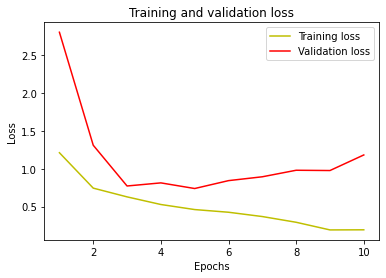

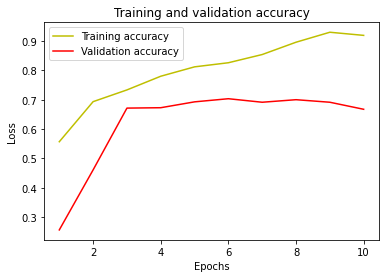

In [42]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#plot the training and validation accuracy and loss at each epoch
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
from keras.models import load_model

cnn_model = load_model('cnn.h5')

In [44]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[123 109 114   2]
 [ 32 285  61   3]
 [ 37  55 261  19]
 [  2   9   2 386]]


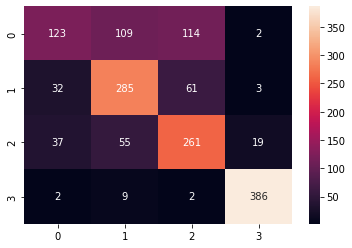

In [45]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True,fmt="d")

In [46]:
#Now, let us use features from convolutional network for ML
X_for_model = feature_extractor.predict(x_train) 

In [47]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X_for_model, y_train)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    Accuracy= metrics.accuracy_score(y_test,predicted)

    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('Accuracy_mymodel', Accuracy)



    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(y_test, predicted)
    mse = metrics.mean_squared_error(y_test, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
    r2_square = metrics.r2_score(y_test, predicted)
    Accuracy= metrics.accuracy_score(y_test,predicted)

    return mae, mse, rmse, r2_square, Accuracy

#  KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_for_model, y_train)
knn_model

KNeighborsClassifier()

In [49]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = knn_model.predict(X_test_feature)

In [50]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.508
MSE: 0.8266666666666667
RMSE: 0.9092121131323904
R2 Square 0.3353145248785342
Accuracy_mymodel 0.642
__________________________________


In [51]:
results_df = pd.DataFrame(data=[["KNeighborsClassifier", *evaluate(y_test, predicted) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel'])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508,0.826667,0.909212,0.335315,0.642


In [52]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.45      0.57      0.51       348
           1       0.61      0.54      0.58       381
           2       0.61      0.51      0.55       372
           3       0.90      0.92      0.91       399

    accuracy                           0.64      1500
   macro avg       0.64      0.64      0.64      1500
weighted avg       0.65      0.64      0.64      1500



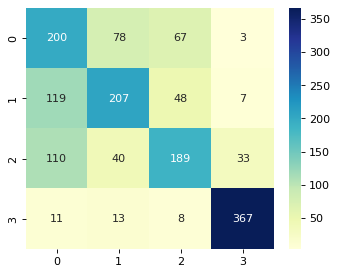

In [53]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# svc

In [54]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear")
svm_model = svm_model.fit(X_for_model, y_train)
svm_model

SVC(kernel='linear')

In [55]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = svm_model.predict(X_test_feature)
#Inverse le transform to get original label back. 


print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.4093333333333333
MSE: 0.6653333333333333
RMSE: 0.8156796756897485
R2 Square 0.465035399861917
Accuracy_mymodel 0.7133333333333334
__________________________________


In [56]:
results_df_2 = pd.DataFrame(data=[["SVC", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333


In [57]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       348
           1       0.70      0.66      0.68       381
           2       0.68      0.61      0.64       372
           3       0.92      0.96      0.94       399

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



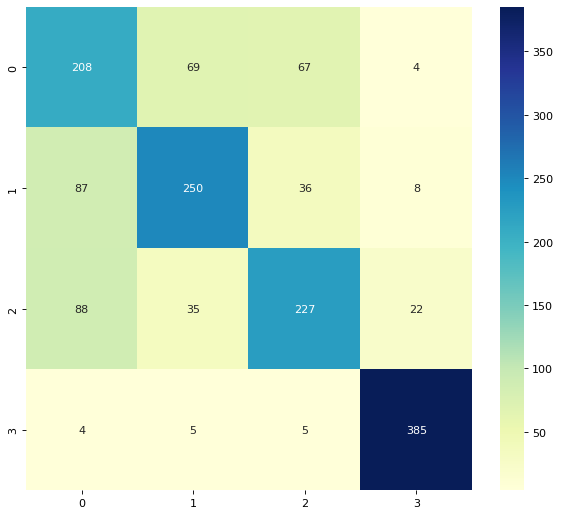

In [58]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# RBF SVC


In [59]:
from sklearn.svm import SVC

svc_model = SVC(kernel = "rbf").fit(X_for_model, y_train)
svc_model = svc_model.fit(X_for_model, y_train)
svc_model

SVC()

In [60]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = svc_model.predict(X_test_feature)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.39066666666666666
MSE: 0.6346666666666667
RMSE: 0.7966596931354484
R2 Square 0.48969308684222945
Accuracy_mymodel 0.7273333333333334
__________________________________


In [61]:
results_df_2 = pd.DataFrame(data=[["RBF SVC", *evaluate(y_test, predicted) ]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333
2,RBF SVC,0.390667,0.634667,0.796660,0.489693,0.727333


In [62]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       348
           1       0.71      0.68      0.70       381
           2       0.69      0.65      0.67       372
           3       0.92      0.96      0.94       399

    accuracy                           0.73      1500
   macro avg       0.72      0.72      0.72      1500
weighted avg       0.73      0.73      0.73      1500



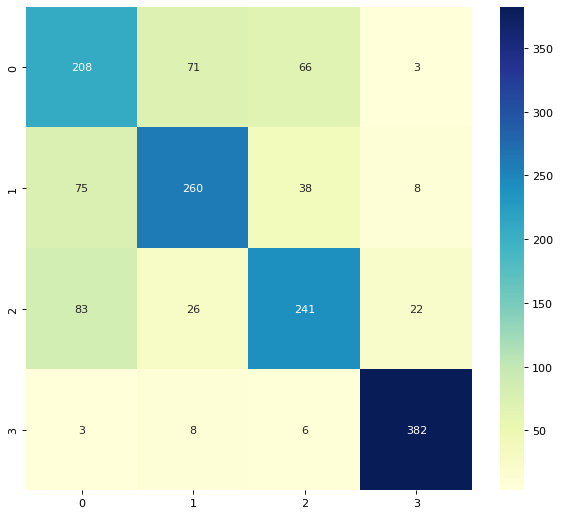

In [63]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# DecisionTreeClassifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
cart_model = DecisionTreeClassifier()
cart_model = cart_model.fit(X_for_model, y_train)
cart_model

DecisionTreeClassifier()

In [65]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = cart_model.predict(X_test_feature)



print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.65
MSE: 1.1433333333333333
RMSE: 1.0692676621563626
R2 Square 0.08069710497313398
Accuracy_mymodel 0.5653333333333334
__________________________________


In [66]:
results_df_2 = pd.DataFrame(data=[["DecisionTreeClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333
2,RBF SVC,0.390667,0.634667,0.796660,0.489693,0.727333
3,DecisionTreeClassifier,0.650000,1.143333,1.069268,0.080697,0.565333


In [67]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.41      0.48      0.44       348
           1       0.51      0.47      0.49       381
           2       0.51      0.46      0.48       372
           3       0.81      0.83      0.82       399

    accuracy                           0.57      1500
   macro avg       0.56      0.56      0.56      1500
weighted avg       0.57      0.57      0.57      1500



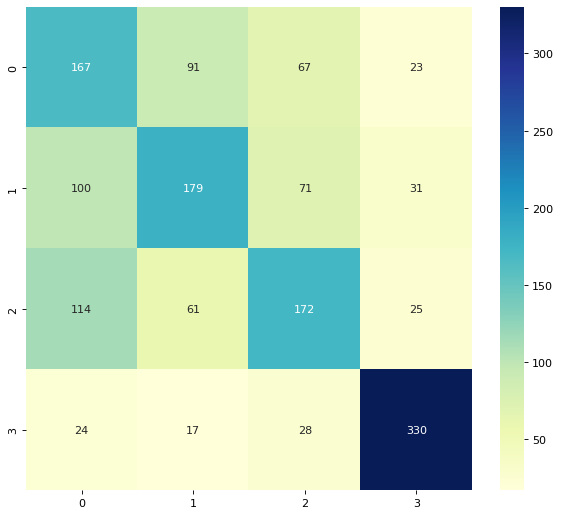

In [68]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# Lojistik regresyon

In [69]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_for_model, y_train)
lr_model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [70]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = lr_model.predict(X_test_feature)



print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.3993333333333333
MSE: 0.646
RMSE: 0.8037412518964048
R2 Square 0.48058046339298355
Accuracy_mymodel 0.718
__________________________________


In [71]:
results_df_2 = pd.DataFrame(data=[["LogisticRegression", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333
2,RBF SVC,0.390667,0.634667,0.796660,0.489693,0.727333
3,DecisionTreeClassifier,0.650000,1.143333,1.069268,0.080697,0.565333
4,LogisticRegression,0.399333,0.646000,0.803741,0.480580,0.718000


In [72]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.56      0.59      0.57       348
           1       0.69      0.67      0.68       381
           2       0.67      0.62      0.64       372
           3       0.92      0.97      0.94       399

    accuracy                           0.72      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.72      0.72      0.72      1500



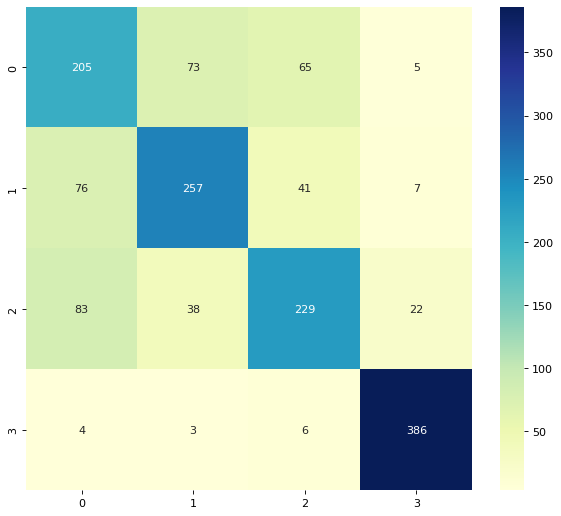

In [73]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# SGDClassifier

In [74]:
from sklearn.linear_model import SGDClassifier

SGD_model = SGDClassifier()
SGD_model = SGD_model.fit(X_for_model, y_train)
SGD_model

SGDClassifier()

In [75]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = SGD_model.predict(X_test_feature)



print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.414
MSE: 0.6713333333333333
RMSE: 0.8193493353468552
R2 Square 0.4602110698005516
Accuracy_mymodel 0.7073333333333334
__________________________________


In [76]:
results_df_2 = pd.DataFrame(data=[["SGDClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333
2,RBF SVC,0.390667,0.634667,0.796660,0.489693,0.727333
3,DecisionTreeClassifier,0.650000,1.143333,1.069268,0.080697,0.565333
4,LogisticRegression,0.399333,0.646000,0.803741,0.480580,0.718000
5,SGDClassifier,0.414000,0.671333,0.819349,0.460211,0.707333


In [77]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56       348
           1       0.66      0.69      0.67       381
           2       0.65      0.59      0.62       372
           3       0.91      0.97      0.94       399

    accuracy                           0.71      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.71      0.70      1500



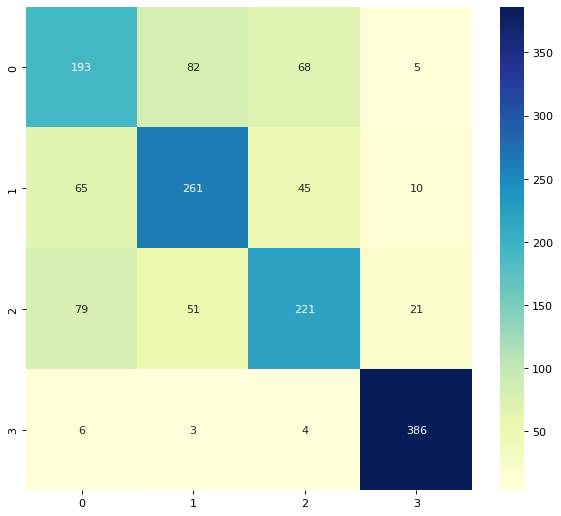

In [78]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# GradientBoostingClassifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier()
GBC_model = GBC_model.fit(X_for_model, y_train)
GBC_model

GradientBoostingClassifier()

In [79]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = GBC_model.predict(X_test_feature)



print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

In [80]:
results_df_2 = pd.DataFrame(data=[["GradientBoostingClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333
2,RBF SVC,0.390667,0.634667,0.796660,0.489693,0.727333
3,DecisionTreeClassifier,0.650000,1.143333,1.069268,0.080697,0.565333
4,LogisticRegression,0.399333,0.646000,0.803741,0.480580,0.718000
5,SGDClassifier,0.414000,0.671333,0.819349,0.460211,0.707333
6,GradientBoostingClassifier,0.414000,0.671333,0.819349,0.460211,0.707333


In [81]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56       348
           1       0.66      0.69      0.67       381
           2       0.65      0.59      0.62       372
           3       0.91      0.97      0.94       399

    accuracy                           0.71      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.71      0.70      1500



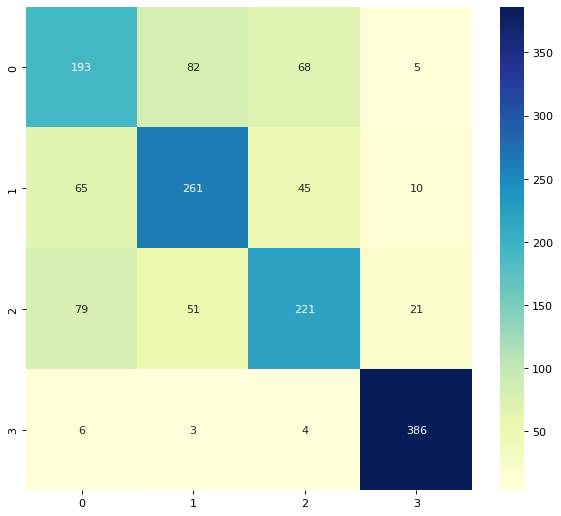

In [82]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# SGDClassifier

In [83]:
from sklearn.linear_model import SGDClassifier

SGD_model = SGDClassifier()
SGD_model = SGD_model.fit(X_for_model, y_train)
SGD_model

SGDClassifier()

In [84]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = SGD_model.predict(X_test_feature)



print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.4246666666666667
MSE: 0.6953333333333334
RMSE: 0.8338664961091394
R2 Square 0.44091374955508966
Accuracy_mymodel 0.7046666666666667
__________________________________


In [85]:
results_df_2 = pd.DataFrame(data=[["SGDClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333
2,RBF SVC,0.390667,0.634667,0.796660,0.489693,0.727333
3,DecisionTreeClassifier,0.650000,1.143333,1.069268,0.080697,0.565333
4,LogisticRegression,0.399333,0.646000,0.803741,0.480580,0.718000
5,SGDClassifier,0.414000,0.671333,0.819349,0.460211,0.707333
6,GradientBoostingClassifier,0.414000,0.671333,0.819349,0.460211,0.707333
7,SGDClassifier,0.424667,0.695333,0.833866,0.440914,0.704667


In [86]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       348
           1       0.70      0.64      0.66       381
           2       0.61      0.63      0.62       372
           3       0.93      0.95      0.94       399

    accuracy                           0.70      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.70      0.70      0.70      1500



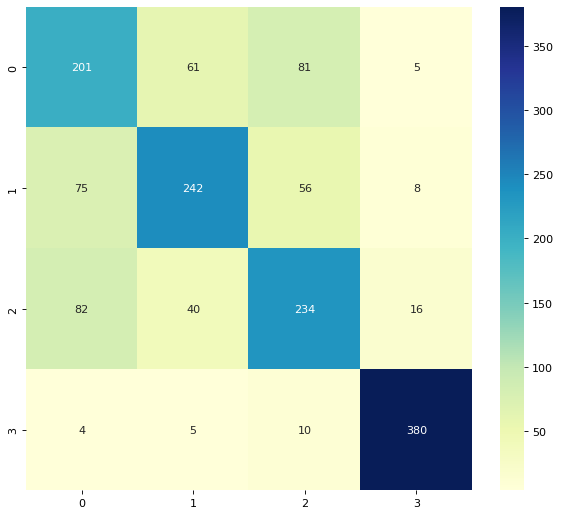

In [87]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# LGBMClassifier

In [88]:
from lightgbm import LGBMClassifier

LGBM_model = LGBMClassifier()
LGBM_model = LGBM_model.fit(X_for_model, y_train)
LGBM_model

LGBMClassifier()

In [89]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = LGBM_model.predict(X_test_feature)



print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.386
MSE: 0.626
RMSE: 0.7912016177940993
R2 Square 0.4966615635975352
Accuracy_mymodel 0.7293333333333333
__________________________________


In [90]:
results_df_2 = pd.DataFrame(data=[["LGBMClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333
2,RBF SVC,0.390667,0.634667,0.796660,0.489693,0.727333
3,DecisionTreeClassifier,0.650000,1.143333,1.069268,0.080697,0.565333
4,LogisticRegression,0.399333,0.646000,0.803741,0.480580,0.718000
5,SGDClassifier,0.414000,0.671333,0.819349,0.460211,0.707333
6,GradientBoostingClassifier,0.414000,0.671333,0.819349,0.460211,0.707333
7,SGDClassifier,0.424667,0.695333,0.833866,0.440914,0.704667
8,LGBMClassifier,0.386000,0.626000,0.791202,0.496662,0.729333


In [91]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       348
           1       0.69      0.70      0.70       381
           2       0.69      0.64      0.67       372
           3       0.90      0.98      0.94       399

    accuracy                           0.73      1500
   macro avg       0.72      0.72      0.72      1500
weighted avg       0.72      0.73      0.73      1500



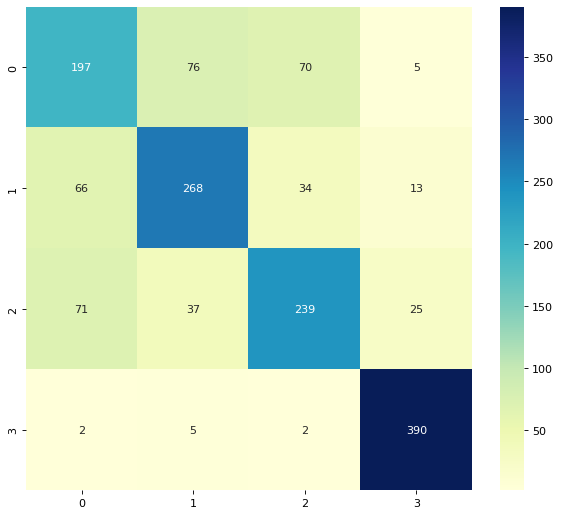

In [92]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# XGBClassifier

In [93]:
from xgboost.sklearn import XGBClassifier

XGBC_model = XGBClassifier()
XGBC_model = XGBC_model.fit(X_for_model, y_train)
XGBC_model

XGBClassifier(objective='multi:softprob')

In [94]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = XGBC_model.predict(X_test_feature)



print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.406
MSE: 0.6566666666666666
RMSE: 0.8103497187428812
R2 Square 0.47200387661722276
Accuracy_mymodel 0.714
__________________________________


In [95]:
results_df_2 = pd.DataFrame(data=[["XGBClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333
2,RBF SVC,0.390667,0.634667,0.796660,0.489693,0.727333
3,DecisionTreeClassifier,0.650000,1.143333,1.069268,0.080697,0.565333
4,LogisticRegression,0.399333,0.646000,0.803741,0.480580,0.718000
5,SGDClassifier,0.414000,0.671333,0.819349,0.460211,0.707333
6,GradientBoostingClassifier,0.414000,0.671333,0.819349,0.460211,0.707333
7,SGDClassifier,0.424667,0.695333,0.833866,0.440914,0.704667
8,LGBMClassifier,0.386000,0.626000,0.791202,0.496662,0.729333
9,XGBClassifier,0.406000,0.656667,0.810350,0.472004,0.714000


In [96]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56       348
           1       0.68      0.68      0.68       381
           2       0.67      0.63      0.65       372
           3       0.91      0.96      0.94       399

    accuracy                           0.71      1500
   macro avg       0.70      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



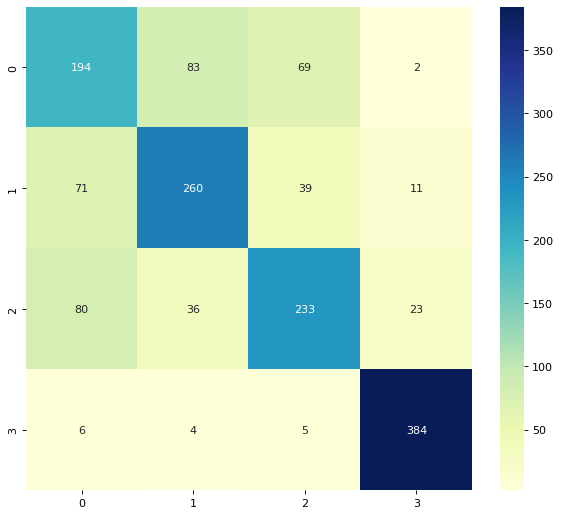

In [97]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")

# RandomForestClassifier

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_for_model, y_train)
rf_model

RandomForestClassifier()

In [99]:
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
predicted = rf_model.predict(X_test_feature)

In [100]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predicted)

Test set evaluation:
_____________________________________
MAE: 0.4206666666666667
MSE: 0.6926666666666667
RMSE: 0.8322659831247861
R2 Square 0.4430578962490299
Accuracy_mymodel 0.7073333333333334
__________________________________


In [101]:
results_df_2 = pd.DataFrame(data=[["RandomForestClassifier", *evaluate(y_test, predicted)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Accuracy_mymodel' ])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Accuracy_mymodel
0,KNeighborsClassifier,0.508000,0.826667,0.909212,0.335315,0.642000
1,SVC,0.409333,0.665333,0.815680,0.465035,0.713333
2,RBF SVC,0.390667,0.634667,0.796660,0.489693,0.727333
3,DecisionTreeClassifier,0.650000,1.143333,1.069268,0.080697,0.565333
4,LogisticRegression,0.399333,0.646000,0.803741,0.480580,0.718000
5,SGDClassifier,0.414000,0.671333,0.819349,0.460211,0.707333
6,GradientBoostingClassifier,0.414000,0.671333,0.819349,0.460211,0.707333
7,SGDClassifier,0.424667,0.695333,0.833866,0.440914,0.704667
8,LGBMClassifier,0.386000,0.626000,0.791202,0.496662,0.729333
9,XGBClassifier,0.406000,0.656667,0.810350,0.472004,0.714000


In [102]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58       348
           1       0.69      0.66      0.67       381
           2       0.68      0.57      0.62       372
           3       0.88      0.96      0.92       399

    accuracy                           0.71      1500
   macro avg       0.70      0.70      0.70      1500
weighted avg       0.71      0.71      0.70      1500



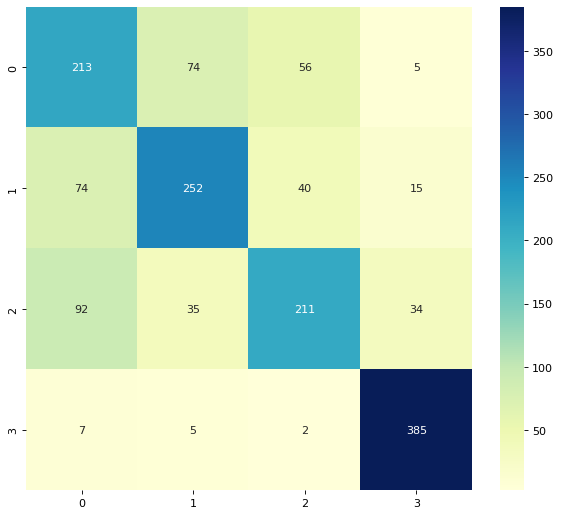

In [103]:
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(9, 8), dpi=80)
cm = confusion_matrix(y_test,predicted)

sns.heatmap(cm, annot=True,fmt="d",cmap="YlGnBu")